In [35]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
data = pd.read_csv('../data/proceed/non_encode_data.csv')
data.head()

C:\Users\exp55\AppData\Local\Temp\ipykernel_6888\149924035.py:1: DtypeWarning: Columns (2,4,8,20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/proceed/non_encode_data.csv')


,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,line_number,invoice_date,customer_order_number,order_date,dss_update_time,day_gap,order_group,value_sales_log_plus1_transformed,value_cost_log_plus1_transformed,value_quantity_log_plus1_transformed
0,2012-05-09,101,411800601,410,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-05-09,2865354,2012-05-09,49:58.7,0,Normal Order,5.390897,5.188489,4.442651
1,2012-02-16,101,361000403,300,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-02-16,2833515,2012-02-16,49:58.7,0,Normal Order,3.670715,3.275513,2.564949
2,2012-05-09,101,361000403,300,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-05-09,2864857,2012-05-08,49:58.7,1,Normal Order,3.718438,3.275513,2.564949
3,2012-05-18,101,565540415,500,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-05-18,2869759,2012-05-18,49:58.7,0,Other,3.049273,2.619467,1.945910
4,2012-01-09,101,565540415,500,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-01-09,2819189,2012-01-09,49:58.7,0,Other,3.002708,2.619467,1.945910


In [37]:
data['order_date'] = pd.to_datetime(data['order_date'])
data['customer_order_number'] = data['customer_order_number'].astype(str)
data['customer_code'] = data['customer_code'].astype(str)


In [38]:
filtered_data = data[['order_date','customer_code', 'customer_order_number', 'value_sales', 'value_cost', 'value_quantity']]
filtered_data

,order_date,customer_code,customer_order_number,value_sales,value_cost,value_quantity
0,2012-05-09,411800601,2865354,218.40,178.1976,84.0
1,2012-02-16,361000403,2833515,38.28,25.4568,12.0
2,2012-05-08,361000403,2864857,40.20,25.4568,12.0
3,2012-05-18,565540415,2869759,20.10,12.7284,6.0
4,2012-01-09,565540415,2819189,19.14,12.7284,6.0
...,...,...,...,...,...,...
1971495,2013-11-06,299480704,3079784,244.00,105.5600,8.0
1971496,2013-06-27,500900630,3024473,1185.00,681.4500,5.0
1971497,2013-10-21,552800304,3070986,232.19,58.7915,31.0
1971498,2013-10-28,565540407,3073478,31.00,13.1950,1.0


In [39]:
filtered_data[['customer_code','customer_order_number']].value_counts()

customer_code  customer_order_number
302100200      263824                   301
               258450                   277
               257823                   264
               264627                   264
               265611                   262
                                       ... 
412000003      3046030                    1
               3046219                    1
               3047003                    1
               3050920                    1
               3019237                    1
Name: count, Length: 642294, dtype: int64

In [40]:
filtered_data[['customer_order_number', 'customer_code']].drop_duplicates()

,customer_order_number,customer_code
0,2865354,411800601
1,2833515,361000403
2,2864857,361000403
3,2869759,565540415
4,2819189,565540415
...,...,...
1971489,3032432,650000511
1971491,3025389,430600702
1971494,3079457,565540405
1971495,3079784,299480704


In [41]:
test = filtered_data[['customer_order_number', 'customer_code']].drop_duplicates(subset=['customer_order_number', 'customer_code'])
test['customer_order_number'].value_counts()

customer_order_number
6123431    2
6127907    2
2856378    2
2915343    2
3085035    2
          ..
3104041    1
3055384    1
3107161    1
3094751    1
3015328    1
Name: count, Length: 642288, dtype: int64

In [42]:
# Reference date for calculating recency
reference_date = pd.to_datetime('2013-12-31')

# Group by customer_code to calculate RFM metrics
rfm = data.groupby('customer_code').agg({
    'order_date': lambda x: (reference_date - x.max()).days,  # Recency
    'customer_code': 'count',  # Frequency
    'value_sales': 'sum'  # Monetary
})

# Rename columns for clarity
rfm.columns = ['recency', 'frequency', 'monetary']

# Display the RFM table
rfm = rfm.reset_index()
rfm.round(2)


,customer_code,recency,frequency,monetary
0,100050100,12,237,4800626.36
1,100210100,40,36,73415.70
2,100230100,266,5,37190.92
3,100250200,40,8,12171.25
4,100270100,42,93,91728.16
...,...,...,...,...
4457,ZI9000101,22,582,305996.55
4458,ZI9000102,12,1870,1141040.07
4459,ZI9000103,340,2,658.66
4460,ZI9500101,382,1,212.11


In [43]:
# Assign scores using quantiles
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine the scores to create a composite RFM score
rfm['RFM_score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)

# Display the scored RFM table
rfm[['customer_code', 'recency', 'frequency', 'monetary', 'recency_score', 'frequency_score', 'monetary_score', 'RFM_score']]


,customer_code,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
0,100050100,12,237,4.800626e+06,5,4,5,545
1,100210100,40,36,7.341570e+04,3,2,4,324
2,100230100,266,5,3.719092e+04,1,1,3,113
3,100250200,40,8,1.217125e+04,3,1,3,313
4,100270100,42,93,9.172816e+04,3,3,4,334
...,...,...,...,...,...,...,...,...
4457,ZI9000101,22,582,3.059965e+05,3,4,5,345
4458,ZI9000102,12,1870,1.141040e+06,5,5,5,555
4459,ZI9000103,340,2,6.586650e+02,1,1,1,111
4460,ZI9500101,382,1,2.121120e+02,1,1,1,111


In [44]:
def segment_customer(rfm_score):
    if rfm_score == '555':
        return 'Champion'
    elif rfm_score.startswith('5'):
        return 'Loyal Customer'
    elif rfm_score[1] == '5':
        return 'Frequent Buyer'
    elif rfm_score[0] == '1':
        return 'At Risk'
    else:
        return 'Others'

# Apply segmentation
rfm['segment'] = rfm['RFM_score'].apply(segment_customer)

# Display the segmented RFM table
rfm[['customer_code', 'recency', 'frequency', 'monetary', 'RFM_score', 'segment']]


,customer_code,recency,frequency,monetary,RFM_score,segment
0,100050100,12,237,4.800626e+06,545,Loyal Customer
1,100210100,40,36,7.341570e+04,324,Others
2,100230100,266,5,3.719092e+04,113,At Risk
3,100250200,40,8,1.217125e+04,313,Others
4,100270100,42,93,9.172816e+04,334,Others
...,...,...,...,...,...,...
4457,ZI9000101,22,582,3.059965e+05,345,Others
4458,ZI9000102,12,1870,1.141040e+06,555,Champion
4459,ZI9000103,340,2,6.586650e+02,111,At Risk
4460,ZI9500101,382,1,2.121120e+02,111,At Risk


In [45]:
data['quarter'] = data['order_date'].dt.to_period("Q")
data['quarter']

0          2012Q2
1          2012Q1
2          2012Q2
3          2012Q2
4          2012Q1
            ...  
1971495    2013Q4
1971496    2013Q2
1971497    2013Q4
1971498    2013Q4
1971499    2013Q3
Name: quarter, Length: 1971500, dtype: period[Q-DEC]

In [46]:
# Reference date (for each quarter, you may update accordingly for your needs)
data['quarter_end_date'] = data['quarter'].dt.end_time
data['quarter_end_date'] = pd.to_datetime(data['quarter_end_date'].dt.date)
#data['quarter'] = data['quarter'].astype(str)
data['order_date'] = pd.to_datetime(data['order_date'])
data['quarter_end_date'] = pd.to_datetime(data['quarter_end_date'])
# Group by customer and quarter to calculate RFM metrics
quarterly_rfm = data.groupby(['customer_code', 'quarter', 'quarter_end_date']).agg({
    'order_date': lambda x: (data.loc[x.index, 'quarter_end_date'].iloc[0] - x.max()).days,  # Recency
    'customer_code': 'count',  # Frequency
    'value_sales': 'sum'  # Monetary
})

# Rename columns
quarterly_rfm.columns = ['recency', 'frequency', 'monetary']

# Display the quarterly RFM table
quarterly_rfm = quarterly_rfm.reset_index()
quarterly_rfm.round(2)


,customer_code,quarter,quarter_end_date,recency,frequency,monetary
0,100050100,2013Q2,2013-06-30,3,155,3945656.08
1,100050100,2013Q3,2013-09-30,8,35,583744.78
2,100050100,2013Q4,2013-12-31,12,47,271225.50
3,100210100,2012Q1,2012-03-31,18,4,5555.12
4,100210100,2012Q2,2012-06-30,25,5,7347.79
...,...,...,...,...,...,...
26449,ZI9000102,2013Q3,2013-09-30,0,337,164103.31
26450,ZI9000102,2013Q4,2013-12-31,12,76,28853.81
26451,ZI9000103,2013Q1,2013-03-31,65,2,658.66
26452,ZI9500101,2012Q4,2012-12-31,17,1,212.11


In [47]:
# Assign scores using quantiles
quarterly_rfm['recency_score'] = pd.qcut(quarterly_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
quarterly_rfm['frequency_score'] = pd.qcut(quarterly_rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
quarterly_rfm['monetary_score'] = pd.qcut(quarterly_rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine the scores to create a composite RFM score
quarterly_rfm['RFM_score'] = quarterly_rfm['recency_score'].astype(str) + quarterly_rfm['frequency_score'].astype(str) + quarterly_rfm['monetary_score'].astype(str)

# Display the scored RFM table
quarterly_rfm[['customer_code', 'quarter', 'recency', 'frequency', 'monetary', 'recency_score', 'frequency_score', 'monetary_score', 'RFM_score']]


,customer_code,quarter,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
0,100050100,2013Q2,3,155,3.945656e+06,5,5,5,555
1,100050100,2013Q3,8,35,5.837448e+05,3,3,5,335
2,100050100,2013Q4,12,47,2.712255e+05,3,3,5,335
3,100210100,2012Q1,18,4,5.555120e+03,2,1,3,213
4,100210100,2012Q2,25,5,7.347790e+03,2,1,3,213
...,...,...,...,...,...,...,...,...,...
26449,ZI9000102,2013Q3,0,337,1.641033e+05,5,5,5,555
26450,ZI9000102,2013Q4,12,76,2.885381e+04,3,4,5,345
26451,ZI9000103,2013Q1,65,2,6.586650e+02,1,1,1,111
26452,ZI9500101,2012Q4,17,1,2.121120e+02,2,1,1,211


In [54]:
quarterly_rfm = quarterly_rfm[quarterly_rfm['quarter_end_date'] >= '2012-01-01']

C:\Users\exp55\AppData\Local\Temp\ipykernel_6888\1185202073.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=quarterly_rfm, x='quarter_end_date', y='monetary_score', estimator='mean', ci=None, label='Monetary Value')
C:\Users\exp55\AppData\Local\Temp\ipykernel_6888\1185202073.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=quarterly_rfm, x='quarter_end_date', y='recency_score', estimator='mean', ci=None, label='Recency')
C:\Users\exp55\AppData\Local\Temp\ipykernel_6888\1185202073.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=quarterly_rfm, x='quarter_end_date', y='frequency_score', estimator='mean', ci=None, label='Frequency')


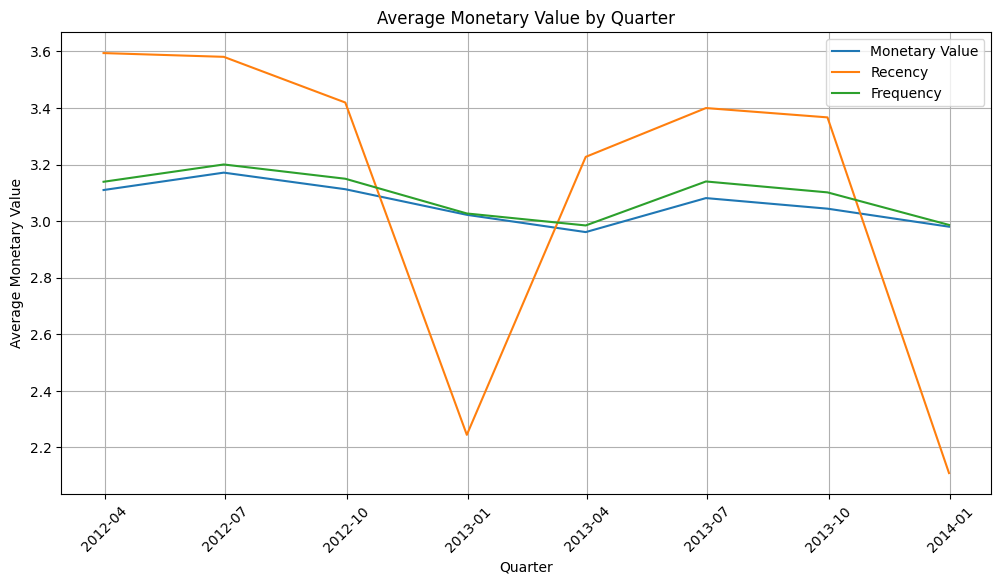

In [63]:
#plot line chart for average monetary value
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_rfm, x='quarter_end_date', y='monetary_score', estimator='mean', ci=None, label='Monetary Value')
sns.lineplot(data=quarterly_rfm, x='quarter_end_date', y='recency_score', estimator='mean', ci=None, label='Recency')
sns.lineplot(data=quarterly_rfm, x='quarter_end_date', y='frequency_score', estimator='mean', ci=None, label='Frequency')
plt.title('Average Monetary Value by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Monetary Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis() 
plt.show()